In [1]:
import pandas as pd 
import numpy as np
import keras
import math 
import random 

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

2023-04-27 17:05:26.283257: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 17:05:26.418179: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-27 17:05:26.418204: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-27 17:05:27.486371: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
# PREPROCESSING
def squash_col_outliers(
    df: pd.DataFrame, 
    col_name: str, 
    min_quantile: float =0.01, 
    max_quantile:float =0.99
): 
    q_lo = df[col_name].quantile(min_quantile)
    q_hi  = df[col_name].quantile(max_quantile)
    
    df.loc[df[col_name] >= q_hi, col_name] = q_hi
    df.loc[df[col_name] <= q_lo, col_name] = q_lo
    return df

df = pd.read_csv("data/prices-d.csv", index_col=0)
df.pop("Volume")
df["Range"] = (df["High"] - df["Low"]) / df["Open"]
df.pop("Open")
df.pop("High")
df.pop("Low")
df['Change'] = df["Adj Close"].pct_change()
df = df. tail(-1) 
df.pop("Close")

df = pd.DataFrame(df.values, columns=['Adj Close', 'Range', 'Change'])
df = squash_col_outliers(df, 'Change')
df = squash_col_outliers(df, "Range", min_quantile=0.0, max_quantile=0.97)
df.head()

,Adj Close,Range,Change
0,1.588667,0.101623,-0.002512
1,1.464000,0.101623,-0.078473
2,1.280000,0.101623,-0.090051
3,1.074000,0.101623,-0.090051
4,1.053333,0.100610,-0.019243


In [ ]:
# IV: Scaling the Data

In [4]:
'''
Scaling input data between 0 and 1 is conventional when preparing inputs to LSTM or other types of 
models. While not strictly necessary, and there are cases when it's not advised, it is considered good 
practice. 
'''

SyntaxError: invalid syntax (3917771242.py, line 4)

In [5]:
'''
IV.A The Scaling Function 

This function uses MinMaxScaler from scikitlearn package to fit the values of a given column between 0 and 1 
(or any given values) and replaces the original column in the DataFrame with the new data. 
'''

def scale_col_values(
    df: pd.DataFrame, 
    col_name:str, 
    min_value:float=0, 
    max_value:float=1
): 
    values = df[col_name].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(min_value, max_value))
    scaled_values = scaler.fit_transform(values)
    df[col_name] = scaled_values.transpose()[0]
    return df

In [6]:
'''
Check the min and max of the Change column before scaling. 
'''
print(df['Change'].min())
print(df['Change'].max())

-0.09005126578365338
0.10999024964609014


In [7]:
df = scale_col_values(df, 'Change')

In [8]:
'''
Check that it's been changed by the scaling process. 
'''
print(df['Change'].min())
print(df['Change'].max())

0.0
0.9999999999999999


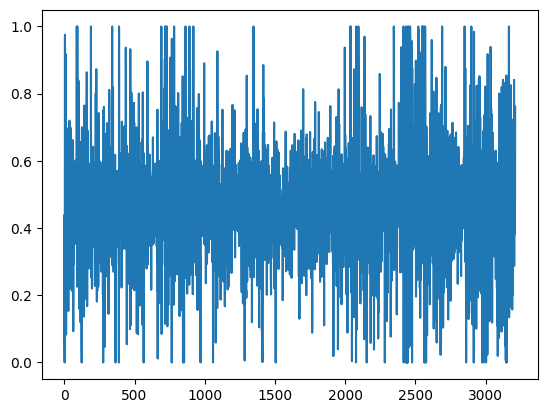

In [9]:
'''
And very importantly, note that the shape of the data has not changed, it's only been rescaled. The plot 
from before looks the same as after, except for the scale of the y axis. 
'''
df['Change'].plot()

In [11]:
'''
Scaling of Range is exactly the same. 
'''
df = scale_col_values(df, 'Range')

<AxesSubplot:>

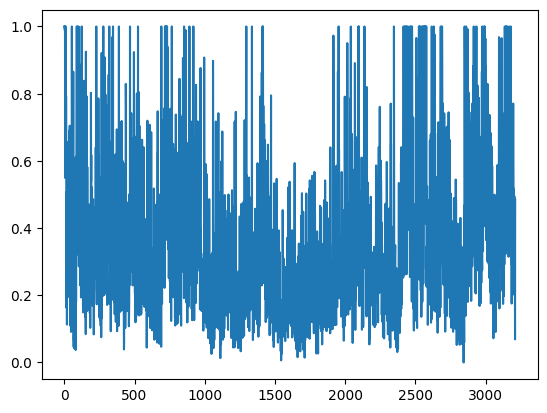

In [12]:
'''
And likewise, the scale has been the only thing changed. 
'''
df['Range'].plot()